## Carga de datos y diagnóstico inicial

Se carga el dataset de churn de clientes de una empresa de telecomunicaciones y se realiza un diagnóstico inicial para identificar:

- Estructura de los datos
- Tipos de variables
- Valores nulos
- Distribución de la variable objetivo

Este análisis permite detectar problemas de calidad de datos antes del proceso de limpieza.

In [1]:
# Importacón de librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carga del dataset

df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [3]:
# Vista general

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Dimensiones del dataset

df.shape

(7043, 21)

In [5]:
# Verificar tipos de datos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Datos estadicticos basicos del dataset

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# Verificar valores nulos

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# Distribución del target en valores absolutos

df["Churn"].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [9]:
# Distribución del target en porcentajes

df["Churn"].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

## Conclusiones iniciales

Tras la exploración inicial del dataset se obtienen las siguientes conclusiones:

- El dataset contiene **7.043 registros** y **21 variables** relacionadas con características demográficas, servicios contratados y facturación de clientes.
- No se detectan valores nulos explícitos
- La variable **TotalCharges** está tipada como texto (`object`) cuando debería ser numérica, lo que indica posibles valores vacíos o inconsistencias que deberán tratarse en la fase de limpieza.
- La variable objetivo **Churn** presenta desbalanceo, pero son valores esperables para el tipo de ánalisis que realizamos:
  - 73% clientes que permanecen
  - 27% clientes que abandonan
- La variable **customerID** es un identificador único y no aporta valor predictivo, por lo que será eliminada en el proceso de modelado.
- Se identifican numerosas variables categóricas binarias (`Yes/No`) que deberán transformarse posteriormente para su uso en modelos de machine learning.
- La variable **SeniorCitizen** está codificada como 0 y 1, representando un valor booleano. Aunque conceptualmente es una variable categórica binaria, se mantendrá como variable numérica para facilitar su uso en el modelado.

Este diagnóstico inicial permite definir los pasos necesarios para la fase de **Limpieza y preparación de datos**.

## Limpieza de datos

Se realiza la preparación de los datos para su posterior análisis y modelado.

Principales transformaciones:

- Eliminación de la variable identificadora `customerID`.
- Conversión de la variable `TotalCharges` a formato numérico, ya que se encontraba como texto debido a valores vacíos.
- Eliminación de registros con valores nulos generados durante la conversión.
- Codificación de la variable objetivo `Churn` en formato binario (0 = No, 1 = Yes).

Tras este proceso se obtiene un dataset limpio y consistente para el análisis exploratorio y la construcción de modelos predictivos.

In [10]:
# Copia del dataset

df_clean = df.copy()

In [11]:
# Eliminar la columna de identificadores

df_clean = df_clean.drop("customerID", axis=1)

In [12]:
# Verificamos valore vacio de la columna TotalCharges

(df_clean["TotalCharges"] == " ").sum()

11

In [13]:
# Transformamos la columna TotalCharges en númerico y los valores vacios a NaN

df_clean["TotalCharges"] = pd.to_numeric(
    df_clean["TotalCharges"],
    errors="coerce"
)

In [14]:
# Verificamos que la transformación se hizo correctamente

df_clean["TotalCharges"].isnull().sum()

11

In [15]:
# Eliminamos los registros con valor TotalCharges = NaN, ya que son clientes de nueva creación que no son útiles para el modelo

df_clean = df_clean.dropna()

In [16]:
# Transformamos la columan Churn (target) a binario

df_clean["Churn"] = df_clean["Churn"].map({
    "No": 0,
    "Yes": 1
})

In [17]:
# Verificación final

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

## Ánalisis exploratorio (EDA)

Se realiza un análisis exploratorio para identificar patrones asociados al abandono de clientes.

Para ello se comparan la diferentes variables del dataset para identificar las cuasas mas probables del churn de clientes.

### Comparación de variables númericas

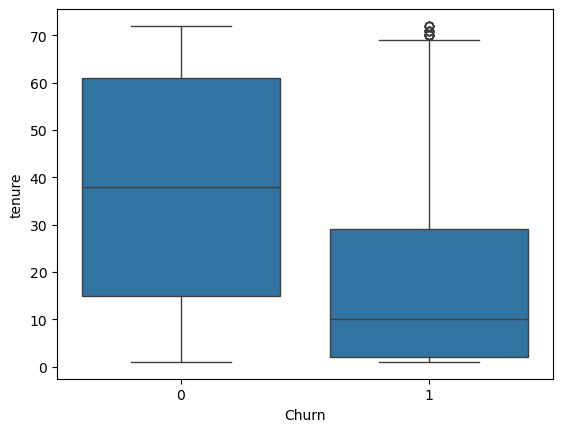

In [18]:
#Tenure vs Churn

sns.boxplot(x="Churn", y="tenure", data=df_clean)
plt.show()

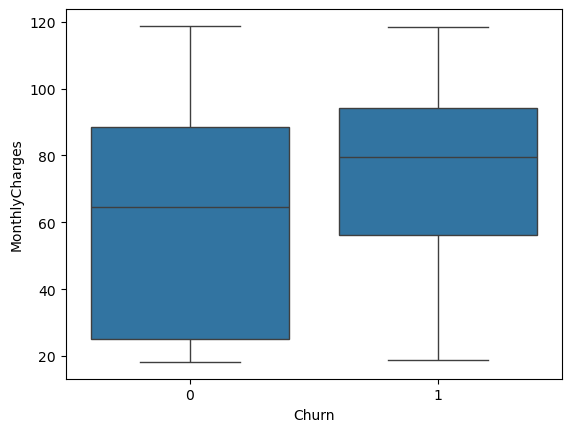

In [19]:
# MonthlyCharges vs Churn

sns.boxplot(x="Churn", y="MonthlyCharges", data=df_clean)
plt.show()

### Comparación de variables categóricas

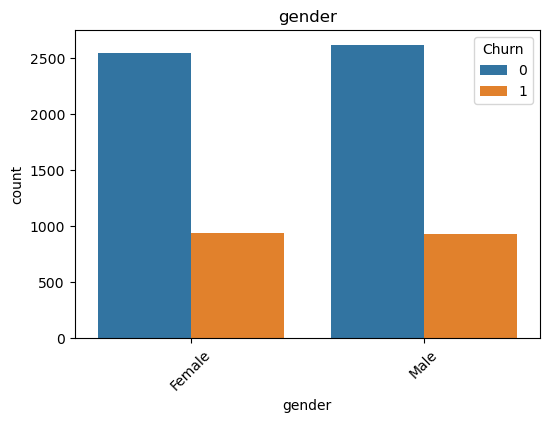

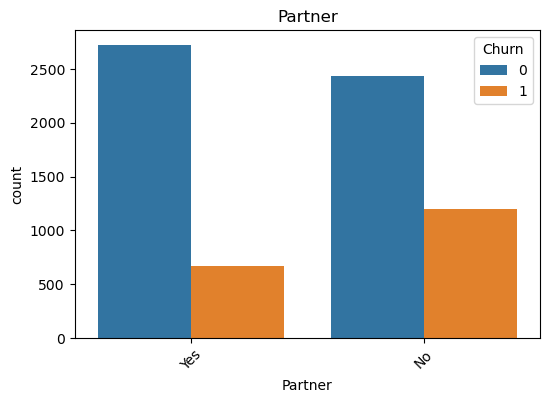

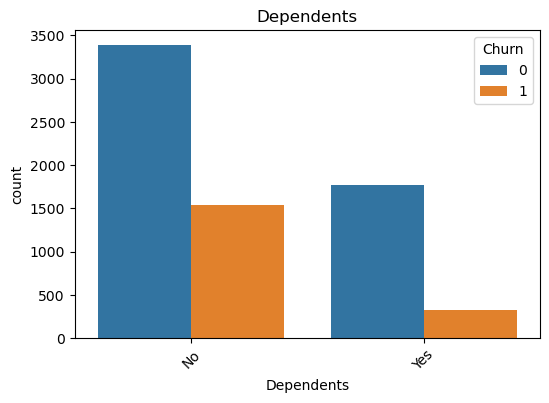

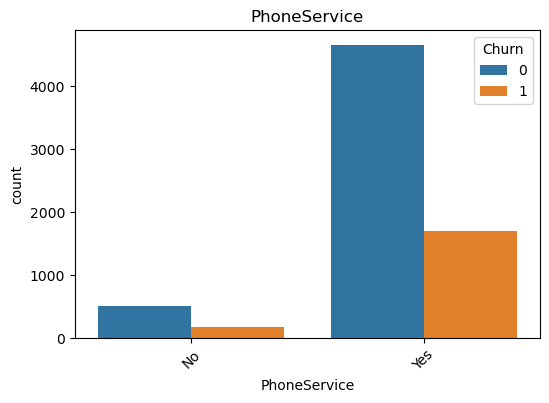

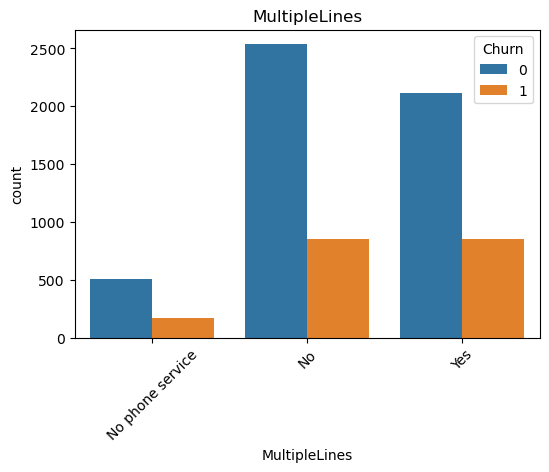

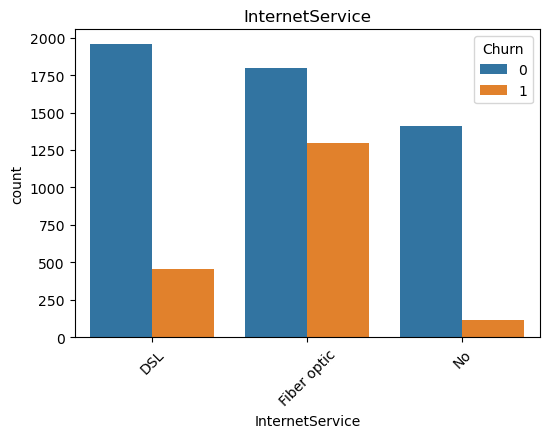

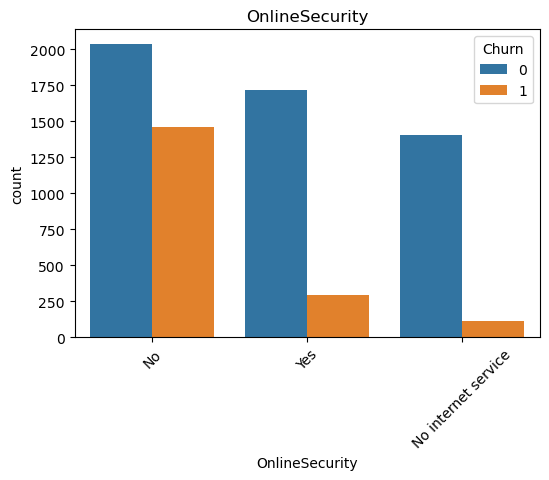

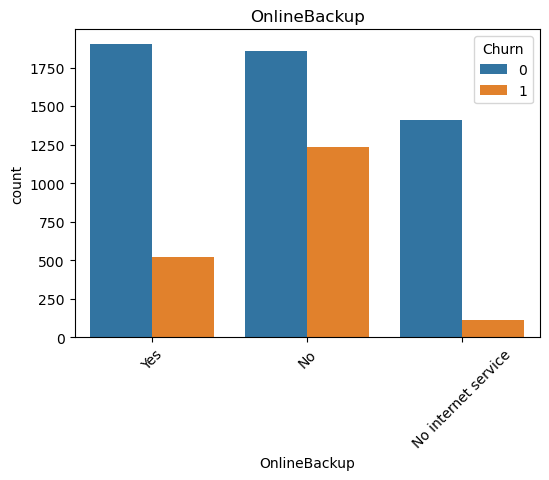

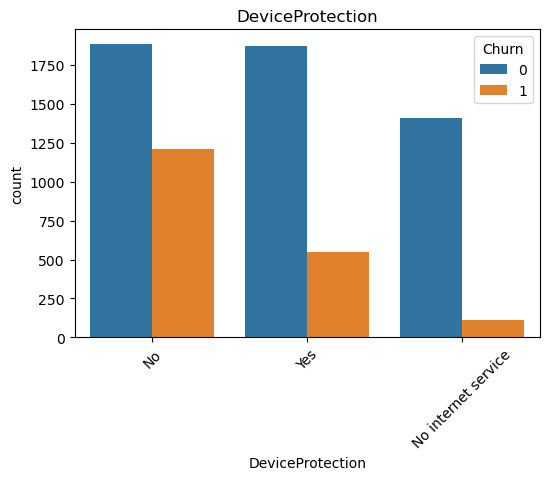

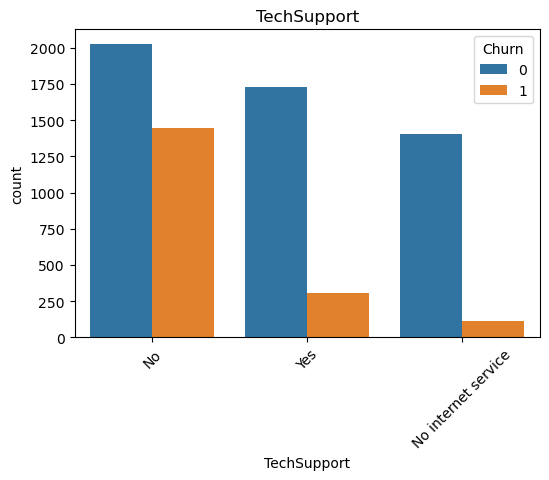

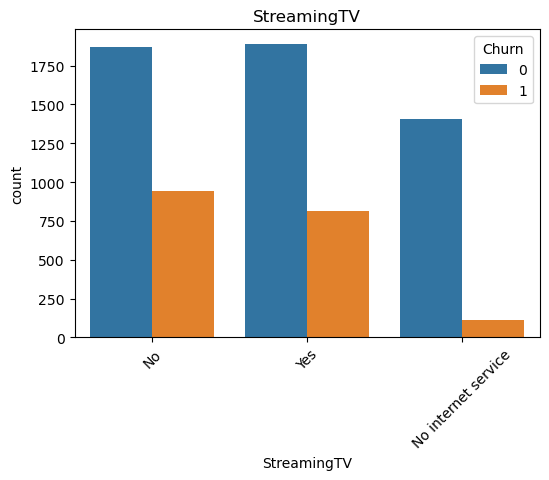

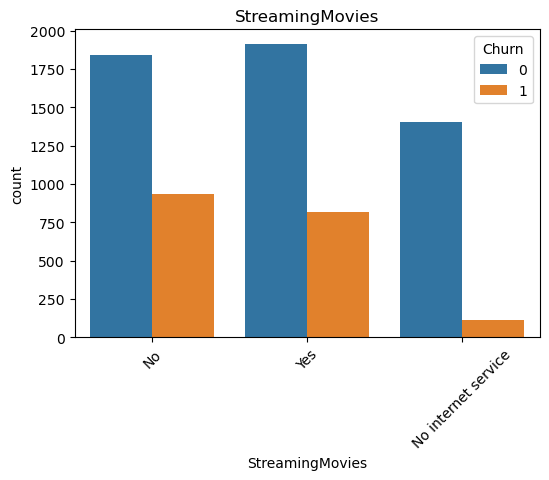

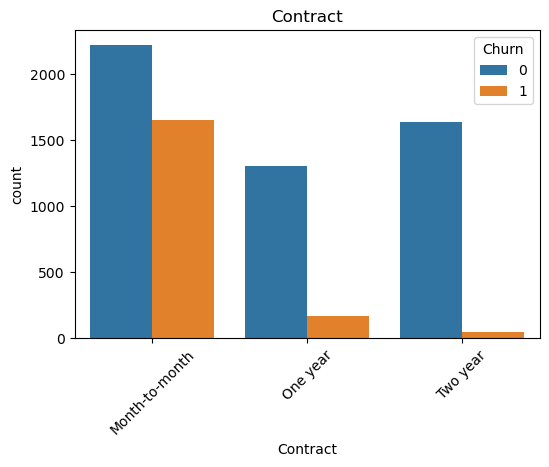

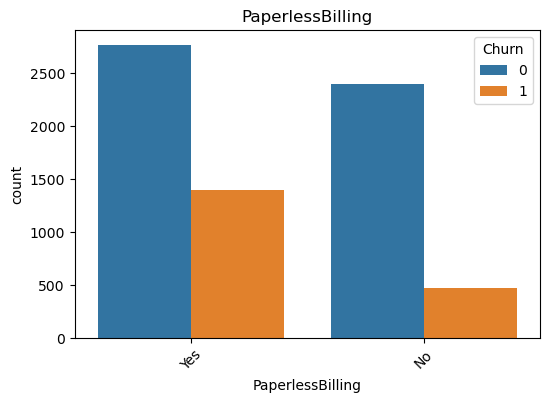

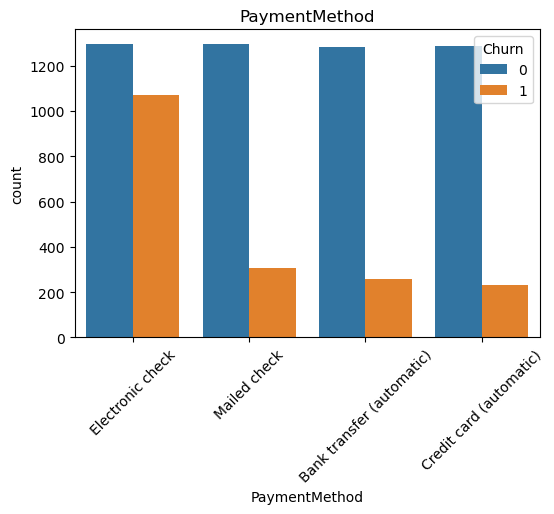

In [20]:
cat_cols = df_clean.select_dtypes(include="object").columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue="Churn", data=df_clean)
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()

## Conclusiones clave del análisis exploratorio

El análisis exploratorio permitió identificar varios factores asociados al abandono de clientes:

- **Antigüedad del cliente (tenure):** Los clientes con menor tiempo en la compañía presentan una mayor tasa de churn, lo que sugiere que el riesgo de abandono es más alto en las primeras etapas del ciclo de vida del cliente.

- **Tipo de contrato:** Los contratos **month-to-month** concentran la mayor proporción de abandono, mientras que los contratos de uno y dos años muestran una mayor estabilidad.

- **Cargos mensuales:** Los clientes con **MonthlyCharges** más elevados tienden a presentar mayor probabilidad de churn.

- **Servicios adicionales:** La ausencia de servicios como **TechSupport**, **OnlineSecurity** o **DeviceProtection** está asociada con mayores tasas de abandono.

- **Tipo de servicio de internet:** Los clientes con **Fiber optic** presentan mayor churn que otros tipos de servicio.

- **Metodo de pago:** Los clientes con un metodo de pago automático presentan menos churn.

In [21]:
# Guardar dataset limpio en CSV para porteriores pasos

df_clean.to_csv("data/df_clean.csv", index=False)